# INSIGHTS FOR ARCGIS NOW WITH PYTHON(ARCGIS ONILNE, PANDAS, MATPLOTLIB, SEABORN.....)

## Explore the data

To better understand trends in permit activity in Montgomery County, you'll create a new notebook in python 3 and add a dataset of permits issued since 2010 using arcGIS online. Before you begin your analysis, however, it's important to explore your data and understand what it shows and does not show. You'll familiarize yourself with the data's attributes, sort the data by type, and visualize spatial and temporal trends. In doing so, you'll gain context for your analysis and know exactly which questions you still need to ask to find out why growth is occurring where and when it is.


Connect your ArcGIS online organization.

In [1]:
from arcgis import *

In [2]:
gis = GIS("https://deldev.maps.arcgis.com", "demo_deldev", "P@ssword123")

Accessing the content property of your gis object you can use the `search()` method. Search for **Commercial Permits since 2010** content made by other users by turning the outside_org to True.You can add name of the owner to you search to get more specific results.

In [348]:
data = gis.content.search('title: Commercial Permits since 2010 owner: rpeake_LearnGIS ', 'Feature layer',
                           outside_org=True)

Importing the **display** module

In [349]:
from IPython.display import display

The loop displays all the items

<Item title:"Commercial Permits since 2010" type:Feature Layer Collection owner:rpeake_LearnGIS>
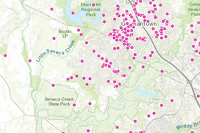

In [350]:
for item in data:
    display(item)

Getting the first item

In [351]:
permits = data[0]

Since the item is a Feature Layer Collection, accessing the layers property will give us a list of FeatureLayer objects.

In [352]:
permit_layer = permits.layers[0]

In [353]:
permit_map = gis.map('Maryland', zoomlevel=9)
permit_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[38.81819928400006, -76.15872999999993], zoom=9)

![](insights_images/image1.png)

You can add a number of different layer objects such as FeatureLayer, FeatureCollection, ImageryLayer, MapImageLayer to the map by calling the `add_layer()` method.

In [354]:
permit_map.add_layer(permit_layer)

Convert the layer into pandas dataframe to analyze it better.

In [355]:
from arcgis.features import SpatialDataFrame

In [356]:
sdf = SpatialDataFrame.from_layer(permit_layer)

`tail()` method gives the last 5 rows of the dataframe.

In [357]:
sdf.tail()

,Added_Date,Address,Applicatio,BldgAreaNu,Building_A,City,DeclValNu,DeclValNu2,Declared_V,Descriptio,...,Pre_direct,State,Status,Street_Nam,Street_Num,Street_Suf,Use_Code,Work_Type,ZIP_code,SHAPE
11219,1391126400000,1015 SPRING ST,COMMERCIAL BUILDING,707.91,707.91,SILVER SPRING,42000.0,42000.0,"$42,000.00",Silver Spring Enterprise Zone\n\nAdd exterior ...,...,,MD,Stop Work,SPRING,1015,ST,BUSINESS BUILDING,ADD,20910,"{'x': -8574668.7047, 'y': 4721607.997599997, '..."
11220,1392076800000,26100 WOODFIELD RD,COMMERCIAL BUILDING,0.00,0,DAMASCUS,5875.0,5875.0,"$5,875.00",PYLON SIGN,...,,MD,Stop Work,WOODFIELD,26100,RD,BUSINESS BUILDING,CONSTRUCT,20872,"{'x': -8594080.2264, 'y': 4762636.6635000035, ..."
11221,1392854400000,10520 MONTROSE AVE,COMMERCIAL BUILDING,728.00,728,BETHESDA,31000.0,31000.0,"$31,000.00",Remodeling a one story building with walk-out ...,...,,MD,Stop Work,MONTROSE,10520,AVE,ASSEMBLY BUILDING,ADD,20814,"{'x': -8582314.4798, 'y': 4725770.635600001, '..."
11222,1394064000000,8500 RIVER RD,COMMERCIAL BUILDING,472.02,472.02,BETHESDA,1000.0,1000.0,"$1,000.00",TOTAL OF 17 GROUPED TENTS FOR 2014 QUICKEN LOA...,...,,MD,Stop Work,RIVER,8500,RD,COMMERCIAL MISCELLANEOUS STRUC,CONSTRUCT,20817,"{'x': -8591206.0439, 'y': 4721680.315399997, '..."
11223,1394409600000,8500 RIVER RD,COMMERCIAL BUILDING,8461.55,8461.55,BETHESDA,1.0,1.0,$1.00,1 GRANDSTAND & MULTIPLE PLATFORMS FOR 2014 QUI...,...,,MD,Stop Work,RIVER,8500,RD,COMMERCIAL MISCELLANEOUS STRUC,CONSTRUCT,20817,"{'x': -8591206.0439, 'y': 4721680.315399997, '..."


In [358]:
sdf.columns

Index(['Added_Date', 'Address', 'Applicatio', 'BldgAreaNu', 'Building_A',
       'City', 'DeclValNu', 'DeclValNu2', 'Declared_V', 'Descriptio', 'FID',
       'Final_Date', 'Issue_Date', 'Location', 'Permit_Num', 'Post_direc',
       'Pre_direct', 'State', 'Status', 'Street_Nam', 'Street_Num',
       'Street_Suf', 'Use_Code', 'Work_Type', 'ZIP_code', 'SHAPE'],
      dtype='object')

In [359]:
sdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Added_Date,11224.0,1.380950e+12,6.564410e+10,1.262563e+12,1.324426e+12,1.382054e+12,1.438042e+12,1.492387e+12
BldgAreaNu,11224.0,9.241779e+03,3.950484e+04,0.000000e+00,2.550000e+02,1.537000e+03,4.000000e+03,1.548205e+06
DeclValNu,11224.0,7.847360e+05,1.152229e+07,0.000000e+00,2.000000e+04,7.400000e+04,2.000000e+05,1.129634e+09
DeclValNu2,11224.0,7.847360e+05,1.152229e+07,0.000000e+00,2.000000e+04,7.400000e+04,2.000000e+05,1.129634e+09
FID,11224.0,5.612500e+03,3.240234e+03,1.000000e+00,2.806750e+03,5.612500e+03,8.418250e+03,1.122400e+04
Issue_Date,10462.0,1.384331e+12,6.347793e+10,1.263514e+12,1.332374e+12,1.383696e+12,1.439942e+12,1.492387e+12
Permit_Num,11224.0,6.558061e+05,7.759285e+04,5.286310e+05,5.874375e+05,6.520735e+05,7.220032e+05,7.961930e+05
ZIP_code,11224.0,2.084899e+04,5.581882e+02,0.000000e+00,2.083200e+04,2.087100e+04,2.090100e+04,2.177100e+04


In [360]:
sdf.dtypes

Added_Date      int64
Address        object
Applicatio     object
BldgAreaNu    float64
Building_A     object
City           object
DeclValNu     float64
DeclValNu2    float64
Declared_V     object
Descriptio     object
FID             int64
Final_Date     object
Issue_Date    float64
Location       object
Permit_Num      int64
Post_direc     object
Pre_direct     object
State          object
Status         object
Street_Nam     object
Street_Num     object
Street_Suf     object
Use_Code       object
Work_Type      object
ZIP_code        int64
SHAPE          object
dtype: object

In [361]:
sdf['Work_Type'].unique()

array(['CONSTRUCT', 'ALTER', 'COMMERCIAL CHANGE OF USE',
       'RESTORE AND / OR REPAIR', 'ADD', 'BUILD FOUNDATION', 'INSTALL',
       'REPLACE', 'CONSTRUCT SHEETING/SHORING', 'FINAL ONLY AP',
       'REMOVE AND REPLACE', 'OCCUPY', 'DEMOLISH'], dtype=object)

In [362]:
sdf['Status'].unique()

array(['Finaled', 'Issued', 'Open', 'Stop Work'], dtype=object)

In [363]:
sdf['Use_Code'].unique()

array(['MULTI-FAMILY DWELLING', 'RESTAURANT', 'BUSINESS BUILDING',
       'MERCANTILE BUILDING', 'PLACE OF WORSHIP', 'ASSEMBLY BUILDING',
       'STORAGE BUILDING', 'GARAGE', 'INSTITUTIONAL BUILDING',
       'COMMERCIAL MISCELLANEOUS STRUC', 'INDUSTRIAL BUILDING',
       'EDUCATIONAL BUILDING', 'TOWER', 'SWIMMING POOL', 'FENCE', 'BANK',
       'SHED', 'MULTI-FAMILY SENIOR CITIZEN BL', 'RETAINING WALL',
       'TRAILER', 'HOSPITAL', 'BIOSCIENCE', 'TOWNHOUSE', 'HOTEL',
       'FACTORY', 'BOARDING HOUSE', 'SWIMMING POOL & FENCE',
       'UTILITY, MISCELLANEOUS', 'THEATER',
       'MULTIFAMILY DWELLING HIGH RISE', 'MULTIFAMILY DWELLING LOW RISE',
       'MISCELLANEOUS STRUCTURE', 'OWNERSHIP UNIT'], dtype=object)

`groupby()` method groups the rows per the column and does calculation for example count in the following code.

In [364]:
permit_by_type = sdf.groupby(['Use_Code']).count()

In [365]:
permit_by_type.head()

,Added_Date,Address,Applicatio,BldgAreaNu,Building_A,City,DeclValNu,DeclValNu2,Declared_V,Descriptio,...,Post_direc,Pre_direct,State,Status,Street_Nam,Street_Num,Street_Suf,Work_Type,ZIP_code,SHAPE
Use_Code,,,,,,,,,,,,,,,,,,,,,
ASSEMBLY BUILDING,394,394,394,394,394,394,394,394,394,394,...,394,394,394,394,394,394,394,394,394,394
BANK,87,87,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
BIOSCIENCE,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
BOARDING HOUSE,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
BUSINESS BUILDING,3461,3461,3461,3461,3461,3461,3461,3461,3461,3461,...,3461,3461,3461,3461,3461,3461,3461,3461,3461,3461


The table is not sorted propeely.Use the `sort()` method to sort it from highest count to lowest count. The most common use code, Business Building, has almost twice as many permits as the second highest, Multi-family Dwelling. The top four use codes together comprise the majority of all permits, so these use codes may be the most important to focus on in your analysis later.

In [383]:
permit_by_type.sort_values(by=['State'], ascending=False, inplace=True)

In [386]:
permit_by_type.head()

,Added_Date,Address,Applicatio,BldgAreaNu,Building_A,City,DeclValNu,DeclValNu2,Declared_V,Descriptio,...,Post_direc,Pre_direct,State,Status,Street_Nam,Street_Num,Street_Suf,Work_Type,ZIP_code,SHAPE
Use_Code,,,,,,,,,,,,,,,,,,,,,
BUSINESS BUILDING,3461,3461,3461,3461,3461,3461,3461,3461,3461,3461,...,3461,3461,3461,3461,3461,3461,3461,3461,3461,3461
MULTI-FAMILY DWELLING,1838,1838,1838,1838,1838,1838,1838,1838,1838,1838,...,1838,1838,1838,1838,1838,1838,1838,1838,1838,1838
COMMERCIAL MISCELLANEOUS STRUC,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,...,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197
MERCANTILE BUILDING,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,...,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016
TOWNHOUSE,680,680,680,680,680,680,680,680,680,680,...,680,680,680,680,680,680,680,680,680,680


In [367]:
permit_by_status = sdf.groupby(sdf['Status']).count()

In [368]:
permit_by_status

,Added_Date,Address,Applicatio,BldgAreaNu,Building_A,City,DeclValNu,DeclValNu2,Declared_V,Descriptio,...,Post_direc,Pre_direct,State,Street_Nam,Street_Num,Street_Suf,Use_Code,Work_Type,ZIP_code,SHAPE
Status,,,,,,,,,,,,,,,,,,,,,
Finaled,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,...,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341
Issued,4696,4696,4696,4696,4696,4696,4696,4696,4696,4696,...,4696,4696,4696,4696,4696,4696,4696,4696,4696,4696
Open,757,757,757,757,757,757,757,757,757,757,...,757,757,757,757,757,757,757,757,757,757
Stop Work,430,430,430,430,430,430,430,430,430,430,...,430,430,430,430,430,430,430,430,430,430


 There are only four permit statuses: Issued, Finaled, Open, and Stop Work. To visualize the number of permits for each status, you'll create a pie chart and  donut chart.

Since the dataframe attributes just show the count of status, you can consider any attribute to for graph of the status count.

In [369]:
status_count = permit_by_status[['City']]

Import matplotlib library

In [371]:
% matplotlib inline
import matplotlib.pyplot as plt

(-1.1230119585990905,
 1.1010958075523376,
 -1.1256150182608435,
 1.1182148562865508)

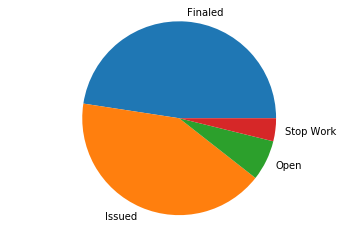

In [374]:
plt.pie(status_count, labels=['Finaled', 'Issued', 'Open', 'Stop Work'])
plt.axis('equal') # keeps the figure shape circle

![](insights_images/image2.png)

(-5.526617896007218, 5.501267518857486, -5.512895239312326, 5.564167256265628)

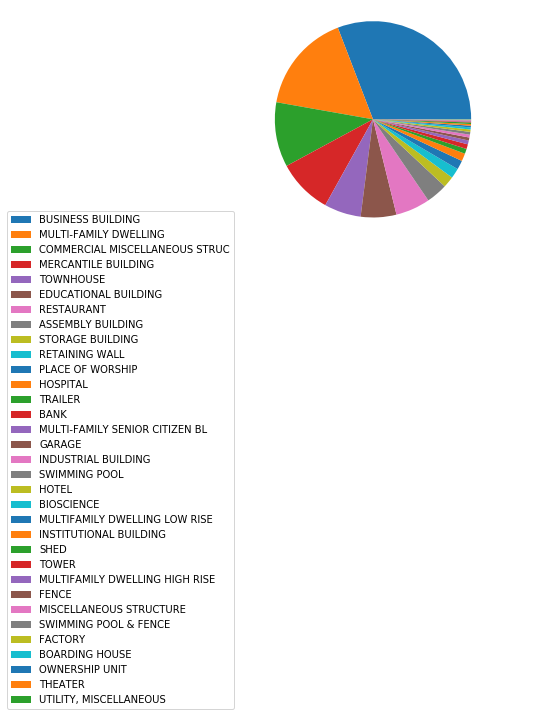

In [412]:
plt.pie(permit_by_type['State'], radius=5)
plt.legend(labels=['BUSINESS BUILDING', 'MULTI-FAMILY DWELLING',
       'COMMERCIAL MISCELLANEOUS STRUC', 'MERCANTILE BUILDING', 'TOWNHOUSE',
       'EDUCATIONAL BUILDING', 'RESTAURANT', 'ASSEMBLY BUILDING',
       'STORAGE BUILDING', 'RETAINING WALL', 'PLACE OF WORSHIP', 'HOSPITAL',
       'TRAILER', 'BANK', 'MULTI-FAMILY SENIOR CITIZEN BL', 'GARAGE',
       'INDUSTRIAL BUILDING', 'SWIMMING POOL', 'HOTEL', 'BIOSCIENCE',
       'MULTIFAMILY DWELLING LOW RISE', 'INSTITUTIONAL BUILDING', 'SHED',
       'TOWER', 'MULTIFAMILY DWELLING HIGH RISE', 'FENCE',
       'MISCELLANEOUS STRUCTURE', 'SWIMMING POOL & FENCE', 'FACTORY',
       'BOARDING HOUSE', 'OWNERSHIP UNIT', 'THEATER',
       'UTILITY, MISCELLANEOUS'], loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.axis('equal') 

![](insights_images/image3.png)

This will show both as donuts.

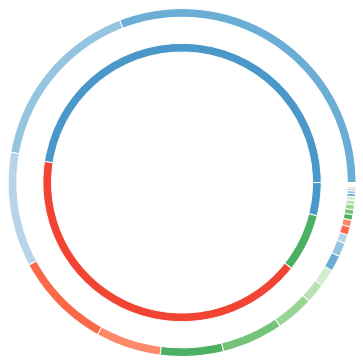

In [420]:
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(permit_by_type['City'], radius=2, labeldistance=0.6, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp(mypie, width=0.1, edgecolor='white')
plt.margins(0,0)
 
# First Ring (inside)
mypie2, _ = ax.pie(status_count, radius=2-0.4, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie2, width=0.1, edgecolor='white')
 
# show it
plt.show()


![](insights_images/image4.png)

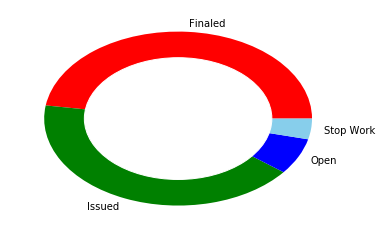

In [427]:
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(status_count, labels=['Finaled', 'Issued', 'Open', 'Stop Work'], colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

![](insights_images/image5.png)

Currently, your map shows permits with a single symbol. However, it's helpful to visualize the spatial distribution of permit attributes. You'll change the map so that each permit's symbol represents its status.

In [428]:
vdf = sdf[['Status', 'City', 'SHAPE']]

In [429]:
map1 = gis.map('Maryland', zoomlevel=8)
map1

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[38.81819928400006, -76.15872999999993], zoom=8)

![](insights_images/image6.png)

In [430]:
vdf.plot(kind='map', map_widget = map1,
        renderer_type='u', # specify the unique value renderer using its notation 'u'
        col='Status'  # column to get unique values from
       )

C:\Users\priyanka\Anaconda3\lib\site-packages\arcgis\features\_data\geodataset\geodataframe.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self['OBJECTID'] = list(range(1, self.shape[0] + 1))


True

## Clean up the data

Before you begin analysis of your data, you'll hide attribute fields you don't intend to use, rename fields with unclear names, and filter your dataset to only show permits with the four most common use codes. These changes won't permanently affect the original dataset, but they will make the data easier to work with and understand.

**'Declared_V'**, **'Building_A'**, **'Applicatio'** attribute fields describe aspects of the data that aren't important for your analysis. You'll drop these fields.

In [431]:
sdf.drop(['Declared_V', 'Building_A', 'Applicatio'], axis=1, inplace=True)

In [432]:
sdf.columns

Index(['Added_Date', 'Address', 'BldgAreaNu', 'City', 'DeclValNu',
       'DeclValNu2', 'Descriptio', 'FID', 'Final_Date', 'Issue_Date',
       'Location', 'Permit_Num', 'Post_direc', 'Pre_direct', 'State', 'Status',
       'Street_Nam', 'Street_Num', 'Street_Suf', 'Use_Code', 'Work_Type',
       'ZIP_code', 'SHAPE'],
      dtype='object')

The fields are no longer listed. 

Next, you'll rename some of the attribute fields with shortened or unclear names so that their names are more descriptive.

In [433]:
sdf.rename(columns={"Descriptio": "Description", "BldgAreaNu": "Building_Area", "DeclValNu": "Declare_Value"}, inplace=True)

In [434]:
sdf.columns

Index(['Added_Date', 'Address', 'Building_Area', 'City', 'Declare_Value',
       'DeclValNu2', 'Description', 'FID', 'Final_Date', 'Issue_Date',
       'Location', 'Permit_Num', 'Post_direc', 'Pre_direct', 'State', 'Status',
       'Street_Nam', 'Street_Num', 'Street_Suf', 'Use_Code', 'Work_Type',
       'ZIP_code', 'SHAPE'],
      dtype='object')

here are other fields that you may want to either rename or remove, but for the purposes of this lesson, these are enough. Next, you'll filter the permits to reduce the number of records in your analysis. As you saw previously, there are four types of permits that comprise over half the total number of permits. Focusing your analysis on just these four types will reduce the amount of data to analyze without ignoring the most important types of development. To remove the other use codes, you'll create a filter.

In [438]:
permit_by_type.head(4) # top 4 Use_Code

,Use_Code,Added_Date,Address,Applicatio,BldgAreaNu,Building_A,City,DeclValNu,DeclValNu2,Declared_V,...,Post_direc,Pre_direct,State,Status,Street_Nam,Street_Num,Street_Suf,Work_Type,ZIP_code,SHAPE
0,BUSINESS BUILDING,3461,3461,3461,3461,3461,3461,3461,3461,3461,...,3461,3461,3461,3461,3461,3461,3461,3461,3461,3461
1,MULTI-FAMILY DWELLING,1838,1838,1838,1838,1838,1838,1838,1838,1838,...,1838,1838,1838,1838,1838,1838,1838,1838,1838,1838
2,COMMERCIAL MISCELLANEOUS STRUC,1197,1197,1197,1197,1197,1197,1197,1197,1197,...,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197
3,MERCANTILE BUILDING,1016,1016,1016,1016,1016,1016,1016,1016,1016,...,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016


In [600]:
array = ['BUSINESS BUILDING', 'MULTI-FAMILY DWELLING', 'COMMERCIAL MISCELLANEOUS STRUC', 'MERCANTILE BUILDING']
filtered_code = permit_by_type.loc[permit_by_type['Use_Code'].isin(array)]

In [601]:
filtered_code

,Use_Code,Added_Date,Address,Applicatio,BldgAreaNu,Building_A,City,DeclValNu,DeclValNu2,Declared_V,...,Post_direc,Pre_direct,State,Status,Street_Nam,Street_Num,Street_Suf,Work_Type,ZIP_code,SHAPE
0,BUSINESS BUILDING,3461,3461,3461,3461,3461,3461,3461,3461,3461,...,3461,3461,3461,3461,3461,3461,3461,3461,3461,3461
1,MULTI-FAMILY DWELLING,1838,1838,1838,1838,1838,1838,1838,1838,1838,...,1838,1838,1838,1838,1838,1838,1838,1838,1838,1838
2,COMMERCIAL MISCELLANEOUS STRUC,1197,1197,1197,1197,1197,1197,1197,1197,1197,...,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197
3,MERCANTILE BUILDING,1016,1016,1016,1016,1016,1016,1016,1016,1016,...,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016


To visualize on map, the top 4 Use_Code, you can filer the dataframe with Use_Code containing only the top 4 atttribute value.

In [445]:
df = sdf.loc[sdf['Use_Code'].isin(array)]

In [446]:
df

,Added_Date,Address,Building_Area,City,Declare_Value,DeclValNu2,Description,FID,Final_Date,Issue_Date,...,Pre_direct,State,Status,Street_Nam,Street_Num,Street_Suf,Use_Code,Work_Type,ZIP_code,SHAPE
0,1262822400000,13536 WATERFORD HILLS BLVD,1336.000,GERMANTOWN,103000.0,103000.0,MODEL: TULIP - Unit #D036 - BLDG #4,1,1.3316e+12,1.310083e+12,...,,MD,Finaled,WATERFORD HILLS,13536,BLVD,MULTI-FAMILY DWELLING,CONSTRUCT,20874,"{'x': -8602565.104, 'y': 4747203.126800001, 's..."
1,1262822400000,13538 WATERFORD HILLS BLVD,1730.000,GERMANTOWN,117000.0,117000.0,MODEL: ORCHID - Unit #D038 - BLDG #4,2,1.33177e+12,1.310083e+12,...,,MD,Finaled,WATERFORD HILLS,13538,BLVD,MULTI-FAMILY DWELLING,CONSTRUCT,20874,"{'x': -8602567.5243, 'y': 4747204.106700003, '..."
2,1262822400000,13540 WATERFORD HILLS BLVD,1336.000,GERMANTOWN,103000.0,103000.0,MODEL: TULIP - Unit #D040 - BLDG #4,3,1.33177e+12,1.310083e+12,...,,MD,Finaled,WATERFORD HILLS,13540,BLVD,MULTI-FAMILY DWELLING,CONSTRUCT,20874,"{'x': -8602569.9445, 'y': 4747205.0867, 'spati..."
3,1262822400000,13542 WATERFORD HILLS BLVD,1730.000,GERMANTOWN,117000.0,117000.0,MODEL: ORCHID - Unit #D042 - BLDG #4,4,1.33177e+12,1.310083e+12,...,,MD,Finaled,WATERFORD HILLS,13542,BLVD,MULTI-FAMILY DWELLING,CONSTRUCT,20874,"{'x': -8602572.3648, 'y': 4747206.066600002, '..."
4,1262822400000,13544 WATERFORD HILLS BLVD,1336.000,GERMANTOWN,103000.0,103000.0,MODEL: TULIP - Unit #D044 - BLDG #4,5,1.33177e+12,1.310083e+12,...,,MD,Finaled,WATERFORD HILLS,13544,BLVD,MULTI-FAMILY DWELLING,CONSTRUCT,20874,"{'x': -8602574.7851, 'y': 4747207.046599999, '..."
5,1262822400000,13546 WATERFORD HILLS BLVD,1730.000,GERMANTOWN,117000.0,117000.0,MODEL: ORCHID - Unit #D046 - BLDG #4,6,1.33177e+12,1.310083e+12,...,,MD,Finaled,WATERFORD HILLS,13546,BLVD,MULTI-FAMILY DWELLING,CONSTRUCT,20874,"{'x': -8602577.2054, 'y': 4747208.026500002, '..."
6,1262822400000,13548 WATERFORD HILLS BLVD,1336.000,GERMANTOWN,103000.0,103000.0,MODEL: TULIP - Unit #D048 - BLDG #4,7,1.33186e+12,1.310083e+12,...,,MD,Finaled,WATERFORD HILLS,13548,BLVD,MULTI-FAMILY DWELLING,CONSTRUCT,20874,"{'x': -8602579.6257, 'y': 4747209.006499998, '..."
7,1262822400000,13550 WATERFORD HILLS BLVD,1730.000,GERMANTOWN,117000.0,117000.0,MODEL: ORCHID - Unit #D050 - BLDG #4,8,1.33212e+12,1.310083e+12,...,,MD,Finaled,WATERFORD HILLS,13550,BLVD,MULTI-FAMILY DWELLING,CONSTRUCT,20874,"{'x': -8602582.0459, 'y': 4747209.986500002, '..."
8,1262822400000,13571 STATION ST,1246.000,GERMANTOWN,105000.0,105000.0,MODEL: AZALEA - Unit E071 - BLDG #5,9,1.31604e+12,1.300666e+12,...,,MD,Finaled,STATION,13571,ST,MULTI-FAMILY DWELLING,CONSTRUCT,20874,"{'x': -8602620.0925, 'y': 4747129.934699997, '..."
9,1262822400000,13573 STATION ST,1783.000,GERMANTOWN,125000.0,125000.0,MODEL: LAVENDER - Unit E073 - BLDG #5,10,1.31604e+12,1.300666e+12,...,,MD,Finaled,STATION,13573,ST,MULTI-FAMILY DWELLING,CONSTRUCT,20874,"{'x': -8602624.1207, 'y': 4747131.644100003, '..."


In [447]:
df_filter = df[['City', 'SHAPE', 'Use_Code']]

In [448]:
filtered_map = gis.map('Maryland', zoomlevel=8)

In [449]:
filtered_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[38.81819928400006, -76.15872999999993], zoom=8)

![](insights_images/image7.png)

In [450]:
df_filter.plot(kind='map', map_widget = filtered_map,
        renderer_type='u', # specify the unique value renderer using its notation 'u'
        col='Use_Code'  # column to get unique values from
       )

C:\Users\priyanka\Anaconda3\lib\site-packages\arcgis\features\_data\geodataset\geodataframe.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self['OBJECTID'] = list(range(1, self.shape[0] + 1))


True

## Visualize temporal and spatial trends

Your data shows permits, but what do these permits say about when and where growth is happening in the county? Your data also contains temporal attribute fields, such as Added_Date, which indicates when a permit was first added to the system. The field has several values that break down the data by year, month, and even hour.

Split the **Added_date** to get year, month, week_of_day

In [451]:
import time
i=0
lst = []
for value in sdf.Added_Date:
    myval = str(value)[:-3]
    dt = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(myval)))
    lst.append(dt)
sdf['date_modified'] = lst

In [452]:
sdf.columns

Index(['Added_Date', 'Address', 'Building_Area', 'City', 'Declare_Value',
       'DeclValNu2', 'Description', 'FID', 'Final_Date', 'Issue_Date',
       'Location', 'Permit_Num', 'Post_direc', 'Pre_direct', 'State', 'Status',
       'Street_Nam', 'Street_Num', 'Street_Suf', 'Use_Code', 'Work_Type',
       'ZIP_code', 'SHAPE', 'date_modified'],
      dtype='object')

In [453]:
import pandas as pd
sdf['datetime'] = pd.to_datetime(sdf['date_modified'])

In [454]:
sdf['year'],sdf['month'],sdf['day_of_week'] = sdf.datetime.dt.year, sdf.datetime.dt.month, sdf.datetime.dt.dayofweek

In [455]:
sdf.year.unique()

array([2010, 2016, 2011, 2012, 2013, 2014, 2015, 2017], dtype=int64)

To visualize patterns in permit activity over time, use groupby() to find out which year had most number of permits

In [457]:
grouped_by_year = sdf.groupby(sdf['year']).count()

In [458]:
grouped_by_year

,Added_Date,Address,Building_Area,City,Declare_Value,DeclValNu2,Description,FID,Final_Date,Issue_Date,...,Street_Num,Street_Suf,Use_Code,Work_Type,ZIP_code,SHAPE,date_modified,datetime,month,day_of_week
year,,,,,,,,,,,,,,,,,,,,,
2010,1279,1279,1279,1279,1279,1279,1279,1279,842,1249,...,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
2011,1547,1547,1547,1547,1547,1547,1547,1547,870,1503,...,1547,1547,1547,1547,1547,1547,1547,1547,1547,1547
2012,1552,1552,1552,1552,1552,1552,1552,1552,790,1504,...,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552
2013,1493,1493,1493,1493,1493,1493,1493,1493,848,1443,...,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493
2014,1671,1671,1671,1671,1671,1671,1671,1671,898,1601,...,1671,1671,1671,1671,1671,1671,1671,1671,1671,1671
2015,1566,1566,1566,1566,1566,1566,1566,1566,664,1439,...,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566
2016,1660,1660,1660,1660,1660,1660,1660,1660,476,1530,...,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660
2017,456,456,456,456,456,456,456,456,8,193,...,456,456,456,456,456,456,456,456,456,456


In [459]:
grouped_by_year.reset_index(inplace=True)

In [460]:
import seaborn as sns

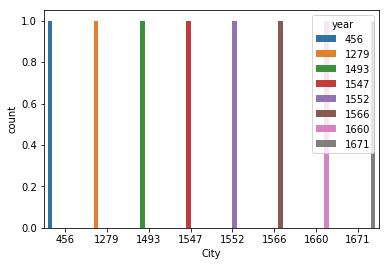

In [461]:
sns.countplot(x="City", hue="year", data=by_year_grouped);

![](insights_images/image8.png)

Alternatively, you can directly use countplot over the column to get the plot

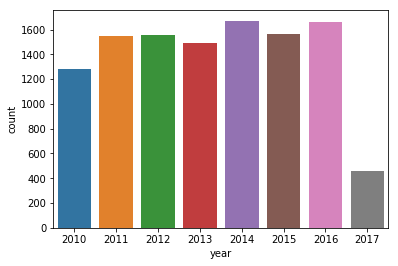

In [462]:
sns.countplot(x="year", data=sdf)

![](insights_images/image9.png)

Similarly you can visualize it by month as well as day_of_week

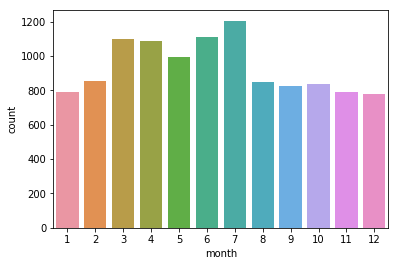

In [463]:
sns.countplot(x="month", data=sdf)

![](insights_images/image10.png)

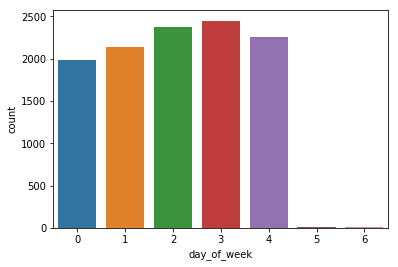

In [464]:
sns.countplot(x="day_of_week", data=sdf)

![](insights_images/image11.png)

In [467]:
lst = ['2010-02-01T05:30:00.000000000', '2011-02-01T05:30:00.000000000', '2012-02-01T05:30:00.000000000',
         '2013-02-01T05:30:00.000000000', '2014-02-01T05:30:00.000000000']
gp_date = sdf.loc[sdf['datetime'].isin(lst)]

In [468]:
gp_date.head()

,Added_Date,Address,Building_Area,City,Declare_Value,DeclValNu2,Description,FID,Final_Date,Issue_Date,...,Street_Suf,Use_Code,Work_Type,ZIP_code,SHAPE,date_modified,datetime,year,month,day_of_week
50,1264982400000,15010 BROSCHART RD,11214.0,ROCKVILLE,210000.0,210000.0,Interior Alterations\n1St Floor,51,1.27138e+12,1.269216e+12,...,RD,BUSINESS BUILDING,ALTER,20850,"{'x': -8593876.2647, 'y': 4736450.687200002, '...",2010-02-01 05:30:00,2010-02-01 05:30:00,2010,2,0
943,1296518400000,6251 EXECUTIVE BLVD,1885.0,ROCKVILLE,10000.0,10000.0,DENTAL OFFICE\nREVISION - 3/15/11 - ELECTRICAL...,944,1.30507e+12,1.297210e+12,...,BLVD,BUSINESS BUILDING,ALTER,20852,"{'x': -8585600.3765, 'y': 4728700.415600002, '...",2011-02-01 05:30:00,2011-02-01 05:30:00,2011,2,1
949,1296518400000,9025 SHADY GROVE CT,900.0,GAITHERSBURG,20000.0,20000.0,Medical Office - 1st floor *INTERMEDIATE FAST ...,950,1.30861e+12,1.300666e+12,...,CT,BUSINESS BUILDING,ALTER,20877,"{'x': -8592008.3716, 'y': 4738734.382299997, '...",2011-02-01 05:30:00,2011-02-01 05:30:00,2011,2,1
2201,1328054400000,5530 WISCONSIN AVE,3626.0,CHEVY CHASE,20800.0,20800.0,Interior Alterations\n14th floor,2202,1344902400000,1.329782e+12,...,AVE,BUSINESS BUILDING,ALTER,20815,"{'x': -8581385.817, 'y': 4716655.9186, 'spatia...",2012-02-01 05:30:00,2012-02-01 05:30:00,2012,2,2
2206,1328054400000,7101 DEMOCRACY BLVD,10571.0,BETHESDA,775000.0,775000.0,Interior demolition and tenant fit out,2207,1351814400000,1.342742e+12,...,BLVD,MERCANTILE BUILDING,ALTER,20817,"{'x': -8587952.034, 'y': 4724840.1963, 'spatia...",2012-02-01 05:30:00,2012-02-01 05:30:00,2012,2,2


[Text(0,0,'2010-02-01T05:30:00.000000000'),
 Text(0,0,'2011-02-01T05:30:00.000000000'),
 Text(0,0,'2012-02-01T05:30:00.000000000'),
 Text(0,0,'2013-02-01T05:30:00.000000000')]

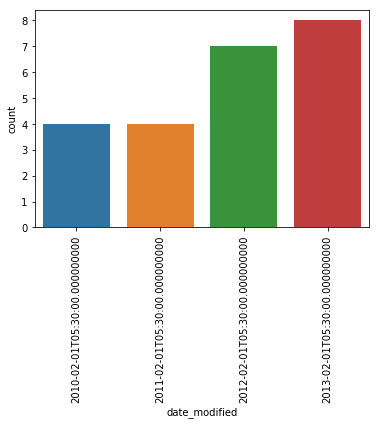

In [472]:
g = sns.countplot(x="date_modified", data=gp_date)
g.set_xticklabels(labels=['2010-02-01T05:30:00.000000000', '2011-02-01T05:30:00.000000000', '2012-02-01T05:30:00.000000000',
         '2013-02-01T05:30:00.000000000', '2014-02-01T05:30:00.000000000'],rotation=90)

![](insights_images/image12.png)

In [493]:
sdf["time"] = sdf['year'].map(str) + "-" + sdf['month'].map(str)

In [508]:
xf = sdf[['time', 'City']]

In [510]:
xf['time'] = pd.to_datetime(xf['time'])

C:\Users\priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


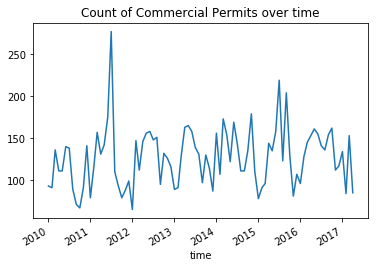

In [514]:
import matplotlib.dates as dates

gp = xf.groupby("time").count()
gp.plot(x_compat=True, title='Count of Commercial Permits over time', legend=False)

![](insights_images/image13.png)

A huge spike in permit activity occurred in mid-2011. What caused this spike? Is it an increase in overall permit activity, or is it mostly an increase in a certain type of permit? You'll group the time series card by use code to answer these questions.

In [517]:
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive

items = list(sdf.columns)
v = widgets.Dropdown(options=items)
display(v)

Dropdown(options=('Added_Date', 'Address', 'Building_Area', 'City', 'Declare_Value', 'DeclValNu2', 'Description', 'FID', 'Final_Date', 'Issue_Date', 'Location', 'Permit_Num', 'Post_direc', 'Pre_direct', 'State', 'Status', 'Street_Nam', 'Street_Num', 'Street_Suf', 'Use_Code', 'Work_Type', 'ZIP_code', 'SHAPE', 'date_modified', 'datetime', 'year', 'month', 'day_of_week', 'time'), value='Added_Date')

In [599]:
v.value

'Work_Type'

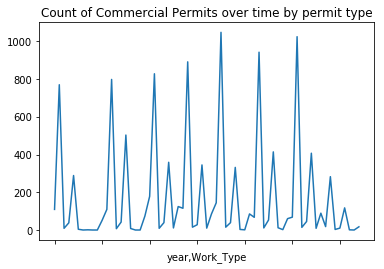

In [555]:
gp_by_yr_m_code = sdf.groupby(['year', v.value]).count()
#gp_by_yr_m_code.reset_index(inplace=True)
grp_code = gp_by_yr_m_code['City'] #city column contains count for each column grouped
grp_code.plot(x_compat=True, title='Count of Commercial Permits over time by permit type')

![](insights_images/image14.png)

In [556]:
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive

items = ['-']+sorted(sdf['Use_Code'].unique().tolist())
def view(x=''):
    if x=='-':
        return df
    return sdf[sdf['Use_Code']==x]
w = widgets.Dropdown(options=items)
interactive(view, x=w)



interactive(children=(Dropdown(description='x', options=('-', 'ASSEMBLY BUILDING', 'BANK', 'BIOSCIENCE', 'BOARDING HOUSE', 'BUSINESS BUILDING', 'COMMERCIAL MISCELLANEOUS STRUC', 'EDUCATIONAL BUILDING', 'FACTORY', 'FENCE', 'GARAGE', 'HOSPITAL', 'HOTEL', 'INDUSTRIAL BUILDING', 'INSTITUTIONAL BUILDING', 'MERCANTILE BUILDING', 'MISCELLANEOUS STRUCTURE', 'MULTI-FAMILY DWELLING', 'MULTI-FAMILY SENIOR CITIZEN BL', 'MULTIFAMILY DWELLING HIGH RISE', 'MULTIFAMILY DWELLING LOW RISE', 'OWNERSHIP UNIT', 'PLACE OF WORSHIP', 'RESTAURANT', 'RETAINING WALL', 'SHED', 'STORAGE BUILDING', 'SWIMMING POOL', 'SWIMMING POOL & FENCE', 'THEATER', 'TOWER', 'TOWNHOUSE', 'TRAILER', 'UTILITY, MISCELLANEOUS'), value='-'), Output()), _dom_classes=('widget-interact',))

EDUCATIONAL BUILDING


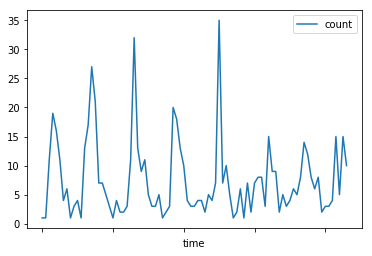

In [591]:
print(w.value)
cf = sdf.groupby(['year','month', 'Use_Code']).count()
cf.reset_index(inplace=True)
cf.rename(columns={"City":"count"}, inplace=True)
cf["time"] = cf['year'].map(str) + cf['month'].map(str)
cf = cf[cf['Use_Code'] ==w.value]
cf.plot(x="time", y="count")

![](insights_images/image15.png)

In [609]:
map2 = gis.map('Maryland', zoomlevel=12)

In [610]:
map2

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[38.81819928400006, -76.15872999999993], zoom=12)

![](insights_images/image16.png)

![](insights_images/image17.png)

In [611]:
vdf.plot(kind='map', map_widget = map2,
        renderer_type='h', # specify the unique value renderer using its notation 'u'
        col='Status'  # column to get unique values from
       )

C:\Users\priyanka\Anaconda3\lib\site-packages\arcgis\features\_data\geodataset\geodataframe.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self['OBJECTID'] = list(range(1, self.shape[0] + 1))


True

The bright yellow areas are where there is a high concentration of permits. The highest concentration areas are in the southeast and northwest corners of the county, which correspond to the major population centers of Germantown and the suburban communities near Washington, D.C